In [1]:
import os
import sys
import time
import numpy as np

from utils.generate_synthetic import simulation, show_synthetic_result
from src.data_class import matrix_class
from src.ICQF import ICQF

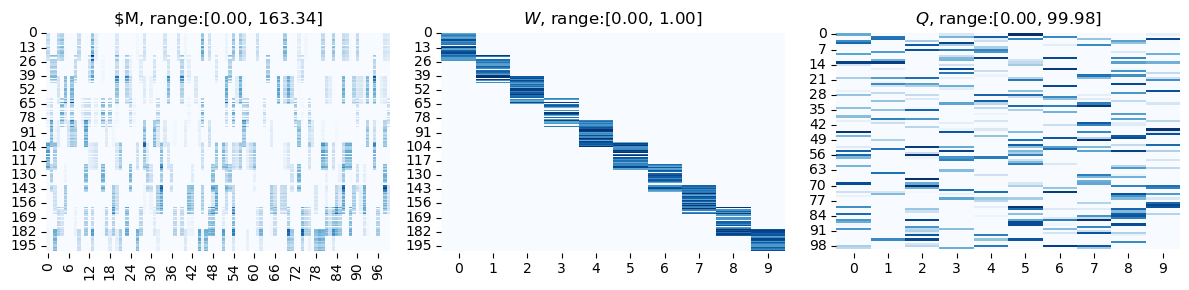

In [2]:
true_W, true_Q, _, M_clean, M, _ = simulation(200, 100, 10)

In [ ]:
import pandas as pd
embed_stat = pd.DataFrame(columns=['repeat', 'fold', 'dimension', 'W_beta', 'Q_beta', 'train_error', 'valid_error'])

In [ ]:
temp = pd.DataFrame(columns=['r','f','e','d','b1','b2'])
for i in range(2):
    for j in range(5):
        temp.loc[len(temp)] = [i,j, np.random.randint(5), i+10, i/10, i/20]

In [ ]:
temp

r    f    e     d   b1    b2
0  0.0  0.0  2.0  10.0  0.0  0.00
1  0.0  1.0  0.0  10.0  0.0  0.00
2  0.0  2.0  2.0  10.0  0.0  0.00
3  0.0  3.0  0.0  10.0  0.0  0.00
4  0.0  4.0  1.0  10.0  0.0  0.00
5  1.0  0.0  1.0  11.0  0.1  0.05
6  1.0  1.0  4.0  11.0  0.1  0.05
7  1.0  2.0  0.0  11.0  0.1  0.05
8  1.0  3.0  2.0  11.0  0.1  0.05
9  1.0  4.0  4.0  11.0  0.1  0.05

In [ ]:
temp_mean = temp.groupby(['d', 'b1', 'b2'])['e'].mean().reset_index()
temp_mean['e'] = temp_mean['e'].astype('float')

In [ ]:
temp_mean

d   b1    b2    e
0  10.0  0.0  0.00  1.0
1  11.0  0.1  0.05  2.2

In [73]:
min_row = temp_mean.loc[temp_mean['e'].idxmin()]

In [76]:
min_row

d     10.0
b1     0.0
b2     0.0
e      1.0
Name: 0, dtype: float64

In [19]:
embed_stat.loc[len(embed_stat)] = [0, 1, 10, 0.01, 0.01, 500, 200]

In [20]:
embed_stat

repeat  fold  dimension  W_beta  Q_beta  train_error  valid_error
0     0.0   1.0       10.0    0.01    0.01        500.0        200.0

In [3]:
MF_data = matrix_class(M=M)
MF_data.check_input()

No M_raw[matrix] provided
Make a copy of M[matrix] as M_raw[matrix]
M[matrix] is not normalized, contains entries > 1
Column-wise maximum of M are ranging 0.000 --  163.343


In [4]:
clf = ICQF(n_components=10,
           W_upperbd=(True, 1.0),
           M_upperbd=(True, np.max(MF_data.M)),
           Q_upperbd=(True, 100),
           verbose=True)

In [5]:
tic = time.perf_counter()
manual_MF_data, loss = clf.fit_transform(MF_data)
toc = time.perf_counter()
print(f"factorization time: {toc-tic:0.4f}s")

loss=2.952e+05, tol=9.843e-05, time/iter=0.00s (-0.00s,-0.00s,-0.00):  42%|████▏     | 83/200 [00:00<00:00, 201.44it/s]

Algorithm converged with relative error < 0.0001.
factorization time: 0.4396s


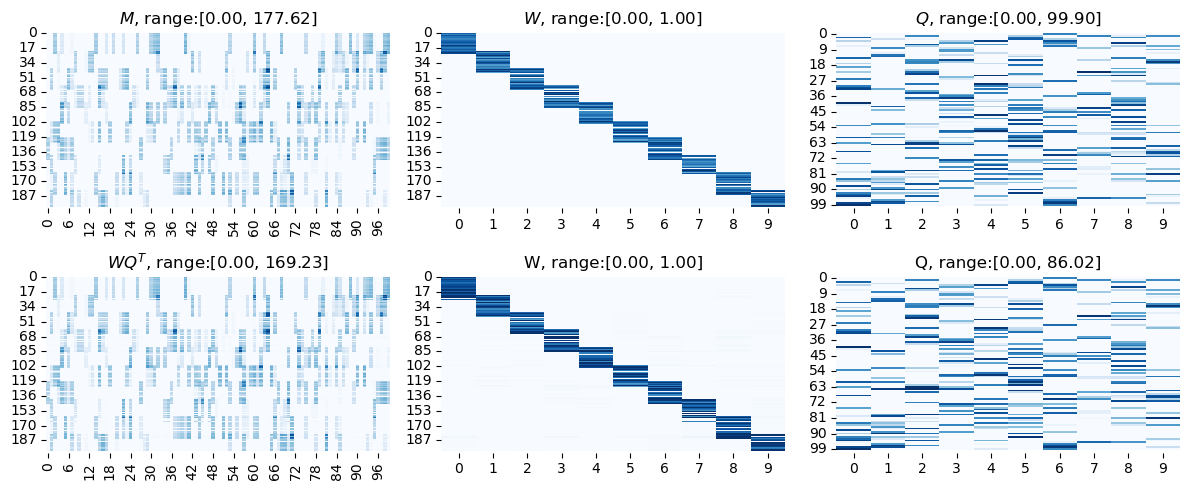

In [6]:
show_synthetic_result(manual_MF_data, true_W, true_Q)

In [7]:
clf.verbose=False
optimal_MF_data, optimal_stat, embed_stat_list = clf.detect_dimension(MF_data, separate_beta=False, nfold=5)

/home/lamk5/miniconda3/envs/ICQF/lib/python3.8/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/lamk5/miniconda3/envs/ICQF/lib/python3.8/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


shared beta search space :  [0.001, 0.01, 0.1, 0.2, 0.5]
dimension detection range: 2 - 20 (10)


dimension detection:   0%|          | 0/5 [00:00<?, ?it/s]

0.8 0.2


repeat-[ 2]: config-[ 2,0.100,0.100], fold-[ 5], optimal-[10, 0.004]:  20%|██        | 1/5 [00:16<01:03, 15.82s/it]

0.8 0.20000000000000004


repeat-[ 3]: config-[ 2,0.100,0.100], fold-[ 3], optimal-[16, 0.005]:  40%|████      | 2/5 [00:31<00:47, 15.78s/it]

0.8 0.19999999999999998


repeat-[ 4]: config-[ 2,0.100,0.100], fold-[ 3], optimal-[20, 0.006]:  60%|██████    | 3/5 [00:47<00:31, 15.58s/it]

0.8 0.2


repeat-[ 5]: config-[ 2,0.100,0.100], fold-[ 5], optimal-[20, 0.006]:  80%|████████  | 4/5 [01:02<00:15, 15.54s/it]

0.8 0.2


repeat-[ 5]: config-[20,0.500,0.500], fold-[ 3], optimal-[20, 0.006]: 100%|██████████| 5/5 [01:17<00:00, 15.59s/it]


In [8]:
embed_stat_list

repeat  fold  dimension  W_beta  Q_beta  train_error  valid_error
0       0.0   2.0        2.0   0.001   0.001   421.759947   471.050337
1       0.0   2.0        2.0   0.010   0.010   421.822108   471.128693
2       0.0   4.0        2.0   0.100   0.100   425.996161   452.954720
3       0.0   1.0        2.0   0.200   0.200   424.507586   463.573000
4       0.0   2.0        2.0   0.500   0.500   433.536274   478.491729
..      ...   ...        ...     ...     ...          ...          ...
470     4.0   0.0       20.0   0.001   0.001     0.005163     0.007464
471     4.0   3.0       20.0   0.010   0.010     0.079401     0.147917
472     4.0   4.0       20.0   0.100   0.100     2.151965     2.677839
473     4.0   4.0       20.0   0.200   0.200     5.685335     7.231270
474     4.0   2.0       20.0   0.500   0.500    23.069470    33.188615

[475 rows x 7 columns]

In [9]:
embed_stat_list.loc[(embed_stat_list['dimension']==15) & (embed_stat_list['W_beta']==0) & (embed_stat_list['Q_beta'] == 0)]

Empty DataFrame
Columns: [repeat, fold, dimension, W_beta, Q_beta, train_error, valid_error]
Index: []

In [10]:
avg_stat = embed_stat_list.groupby(['dimension', 'W_beta', 'Q_beta'])['valid_error'].mean().reset_index()

In [11]:
avg_stat

dimension  W_beta  Q_beta  valid_error
0         2.0   0.001   0.001   466.515422
1         2.0   0.010   0.010   464.142881
2         2.0   0.100   0.100   455.936202
3         2.0   0.200   0.200   470.364488
4         2.0   0.500   0.500   467.714587
..        ...     ...     ...          ...
90       20.0   0.001   0.001     0.005920
91       20.0   0.010   0.010     0.103952
92       20.0   0.100   0.100     3.042495
93       20.0   0.200   0.200     7.655567
94       20.0   0.500   0.500    41.790931

[95 rows x 4 columns]

In [12]:
embed_stat_list.loc[embed_stat_list['valid_error'] < 0.01]

repeat  fold  dimension  W_beta  Q_beta  train_error  valid_error
40      0.0   2.0       10.0   0.001   0.001     0.003902     0.003772
45      0.0   4.0       11.0   0.001   0.001     0.005293     0.009433
50      0.0   4.0       12.0   0.001   0.001     0.005293     0.009433
55      0.0   2.0       13.0   0.001   0.001     0.003902     0.003772
60      0.0   1.0       14.0   0.001   0.001     0.005069     0.009223
65      0.0   0.0       15.0   0.001   0.001     0.005330     0.006919
70      0.0   2.0       16.0   0.001   0.001     0.003902     0.003772
75      0.0   4.0       17.0   0.001   0.001     0.005293     0.009433
80      0.0   2.0       18.0   0.001   0.001     0.003902     0.003772
85      0.0   3.0       19.0   0.001   0.001     0.005098     0.008870
90      0.0   0.0       20.0   0.001   0.001     0.005330     0.006919
135     1.0   0.0       10.0   0.001   0.001     0.004891     0.006574
140     1.0   0.0       11.0   0.001   0.001     0.004891     0.006574
145     1.0   4.0       12.0   0.001   0.001     0.004640     0.006540
155     1.0   4.0       14.0   0.001   0.001     0.004640     0.006540
160     1.0   4.0       15.0   0.001   0.001     0.004640     0.006540
165     1.0   1.0       16.0   0.001   0.001     0.004009     0.005857
170     1.0   4.0       17.0   0.001   0.001     0.004640     0.006540
175     1.0   0.0       18.0   0.001   0.001     0.004891     0.006574
185     1.0   2.0       20.0   0.001   0.001     0.004479     0.006124
230     2.0   3.0       10.0   0.001   0.001     0.004669     0.007632
235     2.0   0.0       11.0   0.001   0.001     0.005231     0.008738
240     2.0   4.0       12.0   0.001   0.001     0.004871     0.007257
245     2.0   0.0       13.0   0.001   0.001     0.005231     0.008738
250     2.0   1.0       14.0   0.001   0.001     0.003804     0.003885
255     2.0   3.0       15.0   0.001   0.001     0.004669     0.007632
265     2.0   3.0       17.0   0.001   0.001     0.004669     0.007632
270     2.0   4.0       18.0   0.001   0.001     0.004871     0.007257
275     2.0   3.0       19.0   0.001   0.001     0.004669     0.007632
280     2.0   1.0       20.0   0.001   0.001     0.003804     0.003885
325     3.0   2.0       10.0   0.001   0.001     0.004937     0.008362
330     3.0   0.0       11.0   0.001   0.001     0.004976     0.006785
335     3.0   0.0       12.0   0.001   0.001     0.004976     0.006785
340     3.0   4.0       13.0   0.001   0.001     0.004155     0.005207
345     3.0   2.0       14.0   0.001   0.001     0.004937     0.008362
350     3.0   2.0       15.0   0.001   0.001     0.004937     0.008362
355     3.0   2.0       16.0   0.001   0.001     0.004937     0.008362
360     3.0   0.0       17.0   0.001   0.001     0.004976     0.006785
365     3.0   2.0       18.0   0.001   0.001     0.004937     0.008362
370     3.0   0.0       19.0   0.001   0.001     0.004976     0.006785
375     3.0   4.0       20.0   0.001   0.001     0.004155     0.005207
420     4.0   0.0       10.0   0.001   0.001     0.005163     0.007464
430     4.0   4.0       12.0   0.001   0.001     0.003585     0.003583
450     4.0   4.0       16.0   0.001   0.001     0.003585     0.003583
455     4.0   1.0       17.0   0.001   0.001     0.004373     0.006280
460     4.0   1.0       18.0   0.001   0.001     0.004373     0.006280
465     4.0   0.0       19.0   0.001   0.001     0.005163     0.007464
470     4.0   0.0       20.0   0.001   0.001     0.005163     0.007464

In [8]:
clf.verbose=False
optimal_MF_data, optimal_stat, embed_stat_list = clf.detect_dimension(MF_data,
                                                                      dimension_list=[8,9,10,11,12],
                                                                      random_fold=False, 
                                                                      repeat=1, 
                                                                      separate_beta=False)

shared beta search space :  [0.0, 0.01, 0.1, 0.2, 0.5]
dimension detection range: 8 - 12


repeat-[ 1]: config-[12,0.500,0.500], fold-[10/10], optimal-[10, 0.001]: 100%|██████████| 1/1 [00:35<00:00, 35.85s/it]


/home/lamk5/miniconda3/envs/ICQF/lib/python3.8/site-packages/scipy/spatial/distance.py:622: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / np.sqrt(uu * vv)


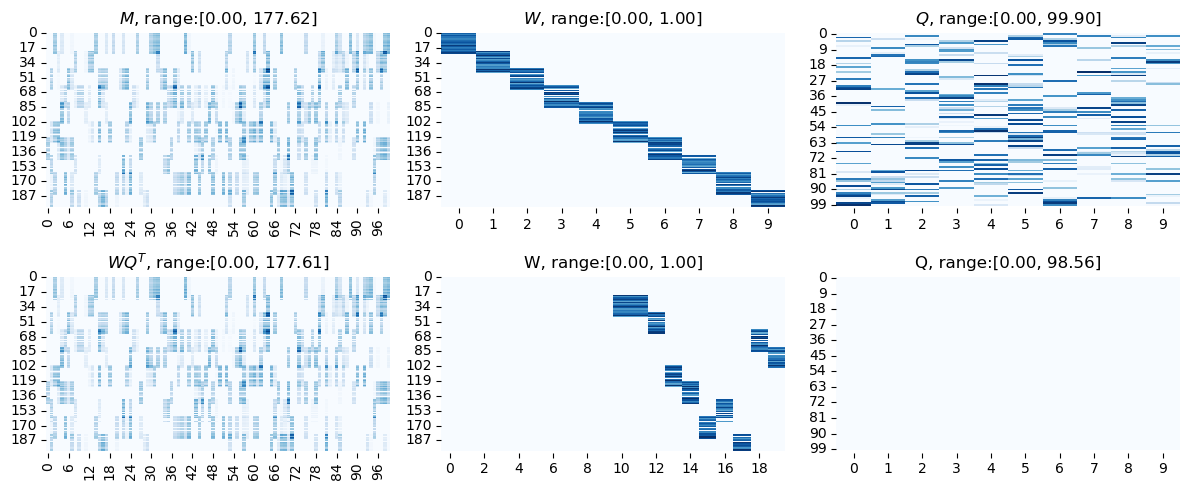

In [13]:
show_synthetic_result(optimal_MF_data, true_W, true_Q)

In [5]:
clf.verbose=False
optimal_MF_data, optimal_stat, embed_stat_list = clf.detect_dimension(MF_data,
                                                                      dimension_list=[8,9,10,11,12],
                                                                      random_fold=False, 
                                                                      repeat=2,
                                                                      nfold=10,
                                                                      mask_type='block',
                                                                      separate_beta=False)

shared beta search space :  [0.001, 0.01, 0.1, 0.2, 0.5]
dimension detection range: 8 - 12


repeat-[ 2]: config-[12,0.500,0.500], fold-[10/10], optimal-[10, 1.300]: 100%|██████████| 2/2 [01:11<00:00, 35.92s/it]


In [6]:
embed_stat_list

repeat  fold  dimension  W_beta  Q_beta  train_error  valid_error
0       0.0   0.0        8.0   0.001   0.001    51.922261    75.576084
1       0.0   1.0        8.0   0.001   0.001    53.491593    60.704172
2       0.0   2.0        8.0   0.001   0.001    52.354151    70.753401
3       0.0   3.0        8.0   0.001   0.001    50.041087    61.732859
4       0.0   4.0        8.0   0.001   0.001    52.765130    92.436783
..      ...   ...        ...     ...     ...          ...          ...
495     1.0   5.0       12.0   0.500   0.500    18.531725    26.635672
496     1.0   6.0       12.0   0.500   0.500    39.023150    67.890549
497     1.0   7.0       12.0   0.500   0.500    18.724847    25.622523
498     1.0   8.0       12.0   0.500   0.500    18.492534    24.526683
499     1.0   9.0       12.0   0.500   0.500    18.457742    27.136077

[500 rows x 7 columns]

In [34]:
P = np.random.rand(10, 5)
idx = np.arange(P.shape[0]*P.shape[1])
n = idx.shape[0]
nc = int(np.ceil(n/10))
np.random.shuffle(idx)
P = P.reshape(-1)
P[idx[0:7*nc]] = 0
P = P.reshape(10,5)
M = np.round(P, 3)
print(M)

[[0.    0.539 0.128 0.679 0.   ]
 [0.    0.    0.    0.    0.918]
 [0.    0.    0.    0.93  0.   ]
 [0.    0.674 0.    0.    0.321]
 [0.923 0.059 0.    0.    0.954]
 [0.    0.564 0.    0.    0.   ]
 [0.    0.    0.    0.824 0.   ]
 [0.    0.    0.053 0.    0.195]
 [0.    0.    0.071 0.    0.   ]
 [0.    0.    0.    0.    0.   ]]


In [38]:
Mp = M>0
Mz = M==0

In [39]:
Mp

array([[False,  True,  True,  True, False],
       [False, False, False, False,  True],
       [False, False, False,  True, False],
       [False,  True, False, False,  True],
       [ True,  True, False, False,  True],
       [False,  True, False, False, False],
       [False, False, False,  True, False],
       [False, False,  True, False,  True],
       [False, False,  True, False, False],
       [False, False, False, False, False]])

In [40]:
Mz

array([[ True, False, False, False,  True],
       [ True,  True,  True,  True, False],
       [ True,  True,  True, False,  True],
       [ True, False,  True,  True, False],
       [False, False,  True,  True, False],
       [ True, False,  True,  True,  True],
       [ True,  True,  True, False,  True],
       [ True,  True, False,  True, False],
       [ True,  True, False,  True,  True],
       [ True,  True,  True,  True,  True]])

In [7]:
np.mean(embed_stat_list.loc[(embed_stat_list['dimension']==12) & (embed_stat_list['W_beta']==0.001) & (embed_stat_list['Q_beta'] == 0.001)]['valid_error'].values)

1.300031973016036

In [8]:
embed_stat_list.loc[embed_stat_list['valid_error'] < 0.1]

repeat  fold  dimension  W_beta  Q_beta  train_error  valid_error
100     0.0   0.0       10.0   0.001   0.001     0.002744     0.000835
101     0.0   1.0       10.0   0.001   0.001     0.002854     0.002856
102     0.0   2.0       10.0   0.001   0.001     0.005282     0.003501
103     0.0   3.0       10.0   0.001   0.001     0.003337     0.009168
105     0.0   5.0       10.0   0.001   0.001     0.003396     0.007942
..      ...   ...        ...     ...     ...          ...          ...
463     1.0   3.0       12.0   0.010   0.010     0.049390     0.064927
465     1.0   5.0       12.0   0.010   0.010     0.053319     0.074733
466     1.0   6.0       12.0   0.010   0.010     0.051390     0.055058
467     1.0   7.0       12.0   0.010   0.010     0.049149     0.083390
469     1.0   9.0       12.0   0.010   0.010     0.051260     0.066298

[96 rows x 7 columns]

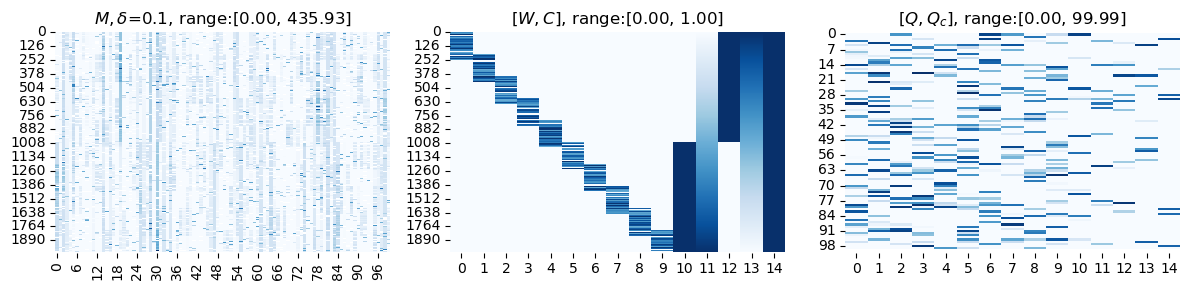

In [14]:
true_W, true_Q, confound_raw, M_clean, M, nan_mask = simulation(2000, 100, 10, 50, density=0.3,
                                                                noise=True, delta=0.1, 
                                                                confound=True,
                                                                missing_ratio=0.05,
                                                                visualize=True)

In [15]:
MF_data = matrix_class(M=M, confound_raw=confound_raw, nan_mask=nan_mask)
MF_data.check_input()

No M_raw[matrix] provided
Make a copy of M[matrix] as M_raw[matrix]
Make a copy of confound_raw[matrix] as confound[matrix]
[[[Warning]]] Input M[matrix] contains 10072 NaN elements
Map NaN entries to zero in M[matrix]
M[matrix] is not normalized, contains entries > 1
Column-wise maximum of M are ranging 118.776 --  435.929


In [5]:
# true_W, true_Q, confound_raw, M_clean, M = simulation(10000, 100, 10, 50, density=0.5,
#                                            noise=True, delta=0.1, confound=False,
#                                            visualize=True)

In [19]:
clf = ICQF(n_components=10,
           W_beta=0.0,
           Q_beta=0.0,
           W_upperbd=(True, 1.0),
           M_upperbd=(True, np.max(MF_data.M)),
           Q_upperbd=(True, 100),
           method='admm', max_iter=2000, min_iter=10, tol=1e-6, verbose=True)

In [10]:
tic = time.perf_counter()
manual_MF_data, loss = clf.fit_transform(MF_data)
toc = time.perf_counter()
print(f"factorization time: {toc-tic:0.4f}s")

loss=4.892e+07, tol=2.673e-07time/iter=0.05s (-0.03s,-0.01s,-0.00):  25%|██▌       | 505/2000 [00:33<01:40, 14.94it/s]

Algorithm converged with relative error < 1e-06.
factorization time: 33.8362s


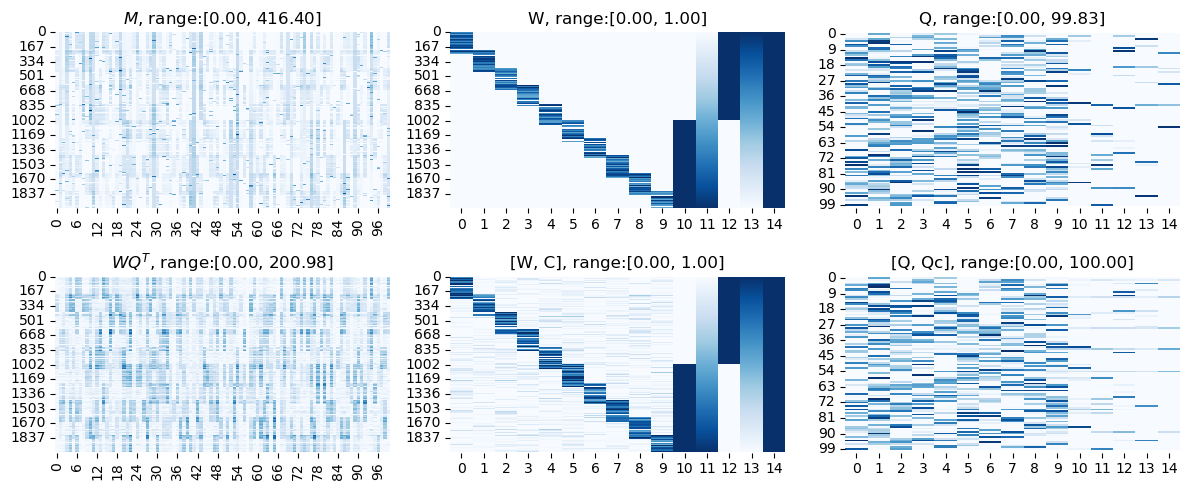

In [11]:
show_synthetic_result(manual_MF_data, true_W, true_Q)

In [27]:
clf = ICQF(n_components=10,
           W_beta=1.0,
           Q_beta=0.0,
           W_upperbd=(True, 1.0),
           M_upperbd=(True, np.max(MF_data.M)),
           Q_upperbd=(True, 100),
           method='hybrid', max_iter=2000, min_iter=10, admm_iter=10, tol=1e-6, verbose=True)

In [16]:
tic = time.perf_counter()
manual_MF_data, loss = clf.fit_transform(MF_data)
toc = time.perf_counter()
print(f"factorization time: {toc-tic:0.4f}s")

loss=6.902e+07, tol=9.097e-07time/iter=0.11s (-0.04s,-0.07s,-0.00):  20%|██        | 403/2000 [01:03<04:10,  6.38it/s]

Algorithm converged with relative error < 1e-06.
factorization time: 63.2190s


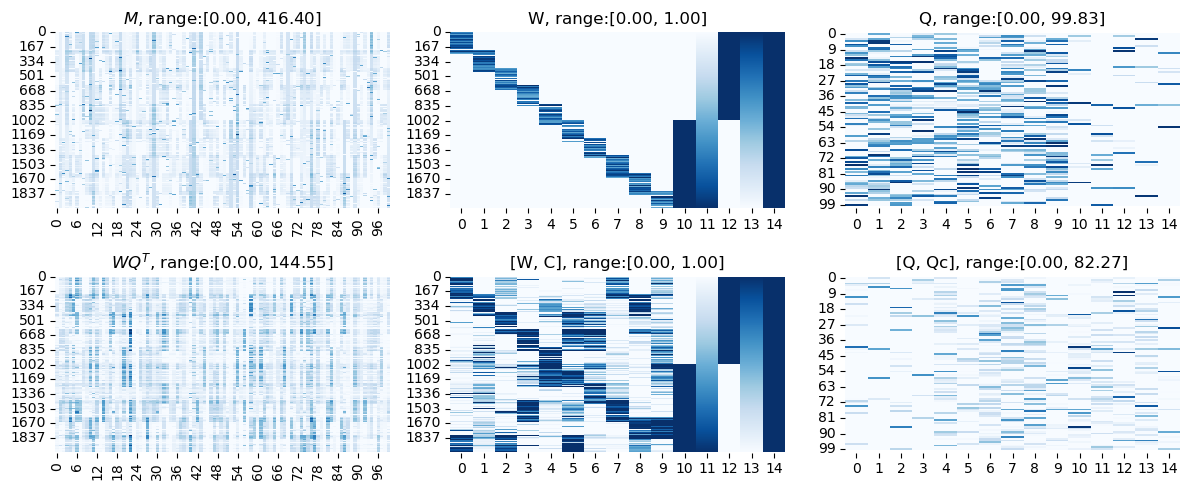

In [14]:
show_synthetic_result(manual_MF_data, true_W, true_Q)

In [16]:
clf = ICQF(n_components=10,
           W_beta=0.1,
           Q_beta=0.1,
           W_upperbd=(True, 1.0),
           M_upperbd=(True, np.max(MF_data.M)),
           Q_upperbd=(True, 100),
           method='cd', max_iter=2000, min_iter=10, tol=1e-4, verbose=True)

In [17]:
tic = time.perf_counter()
manual_MF_data, loss = clf.fit_transform(MF_data)
toc = time.perf_counter()
print(f"factorization time: {toc-tic:0.4f}s")

loss=9.144e+07, tol=9.651e-05, time/iter=0.11s (-0.01s,-0.01s,-0.01):

Algorithm converged with relative error < 0.0001.
factorization time: 13.9393s


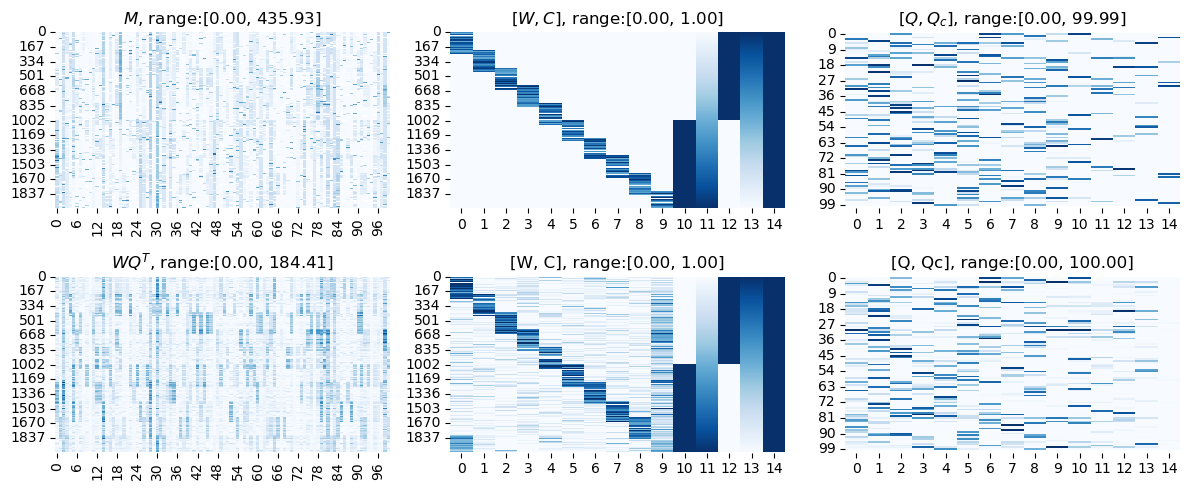

In [18]:
show_synthetic_result(manual_MF_data, true_W, true_Q)

In [11]:
clf.verbose=False
optimal_MF_data, optimal_stat, embed_stat_list = clf.detect_dimension(MF_data, separate_beta=False)

shared beta search space :  [0.0, 0.01, 0.1, 0.2, 0.5]
dimension detection range: 2 - 20 (10)


repeat-[ 2]: config-[15,0.010,0.010], fold-[ 7], optimal-[10, 904.570]:  20%|██        | 1/5 [11:20<45:22, 680.57s/it]


KeyboardInterrupt: 

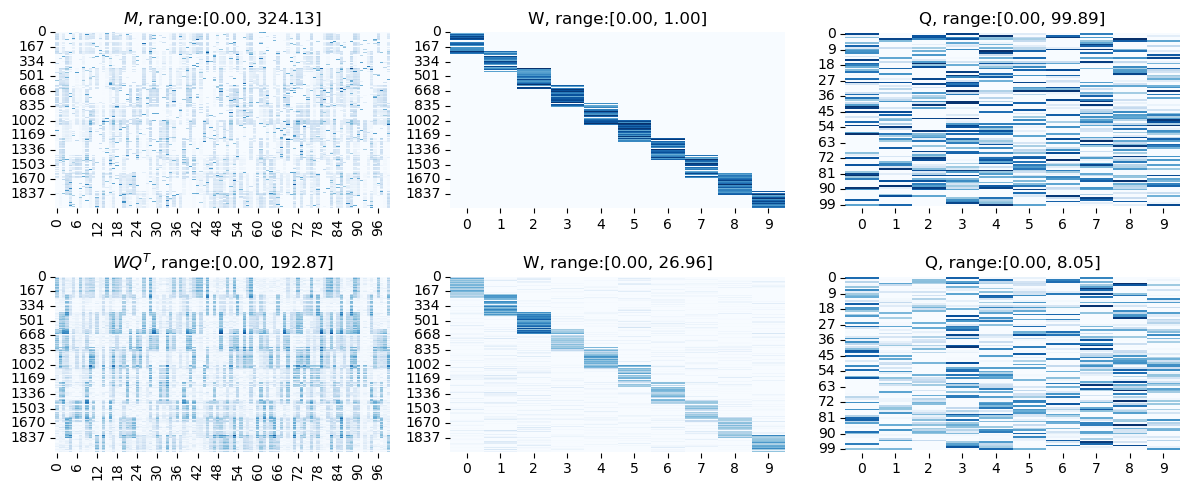

In [12]:
from sklearn.decomposition import NMF
model = NMF(n_components=10, init='random', random_state=0, max_iter=500)
manual_MF_data.W = model.fit_transform(manual_MF_data.M)
manual_MF_data.Q = model.components_.T
show_synthetic_result(manual_MF_data, true_W, true_Q)

In [51]:
clf = ICQF(n_components=10,
           W_beta=0.1,
           Q_beta=0.0,
           W_upperbd=(True, 1.0),
           M_upperbd=(True, np.max(MF_data.M)),
           Q_upperbd=(True, 100),
           method='hybrid', max_iter=2000, min_iter=10, tol=1e-6)

In [52]:
tic = time.perf_counter()
manual_MF_data, loss = clf.fit_transform(MF_data)
toc = time.perf_counter()
print(f"factorization time: {toc-tic:0.4f}s")

factorization time: 3.7919s


In [53]:
clf = ICQF(n_components=10,
           W_beta=0.1,
           Q_beta=0.0,
           W_upperbd=(True, 1.0),
           M_upperbd=(True, np.max(MF_data.M)),
           Q_upperbd=(True, 100),
           method='cd', max_iter=2000, min_iter=10, tol=1e-6)

In [54]:
tic = time.perf_counter()
manual_MF_data, loss = clf.fit_transform(MF_data)
toc = time.perf_counter()
print(f"factorization time: {toc-tic:0.4f}s")

factorization time: 0.6240s


In [22]:
# show_synthetic_result(manual_MF_data, true_W, true_Q)

In [17]:
# from sklearn.decomposition import NMF
# model = NMF(n_components=10, init='random', random_state=0, max_iter=500)
# manual_MF_data.W = model.fit_transform(manual_MF_data.M)
# manual_MF_data.Q = model.components_.T
# show_synthetic_result(manual_MF_data, true_W, true_Q)

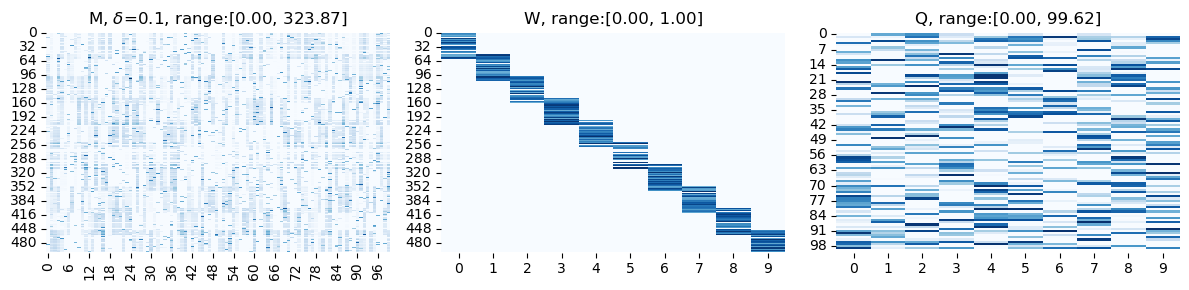

In [55]:
true_W, true_Q, confound_raw, M_clean, M = simulation(500, 100, 10, 10, density=0.5,
                                           noise=True, delta=0.1, confound=False,
                                           visualize=True)

In [8]:
clf = ICQF(n_components=10,
           W_beta=0.1,
           Q_beta=0.0,
           W_upperbd=(True, 1.0),
           M_upperbd=(True, np.max(MF_data.M)),
           Q_upperbd=(True, 100),
           method='cd', max_iter=2000, min_iter=10, tol=1e-4)

In [ ]:
optimal_MF_data, optimal_stat, stat_list = clf.detect_dim(MF_data)

In [57]:
optimal_MF_data, optimal_stat, stat_list = clf.detect_dim(MF_data,
                                                          dimension_list=np.arange(5,15),
                                                          W_beta_list=[0.0,0.01,0.1,1],
                                                          Q_beta_list=[0.0,0.01,0.1,1],
                                                          repeat=2, 
                                                          nfold=20)

estimate detection range
detection range: 5 - 14


repeat-[ 2]: config-[14,1.000,1.000], fold-[ 1], optimal-[10, 710.369]: 100%|██████████| 2/2 [05:09<00:00, 154.51s/it]


In [58]:
optimal_stat

[10, 0.0, 0.01, 738.9808837853894, 710.3692459711033]

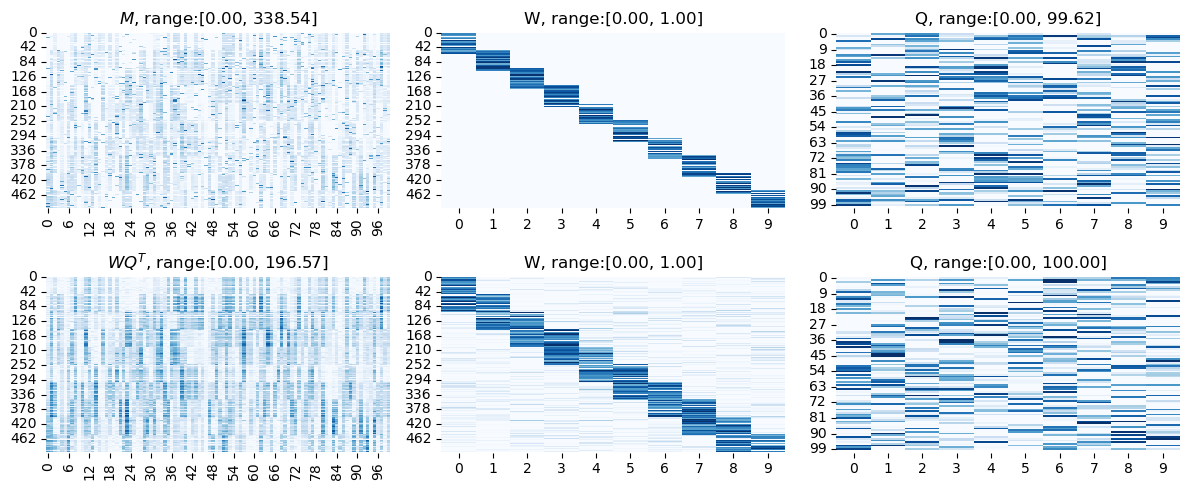

In [59]:
show_synthetic_result(optimal_MF_data, true_W, true_Q)

In [12]:
MF_data.Qc

In [16]:
tic = time.perf_counter()
MF_data, loss = clf.fit_transform(MF_data)
toc = time.perf_counter()
print(f"solving time : {toc-tic:0.4f}s")

Initialization time: 0.1044s
solving time : 30.9765s


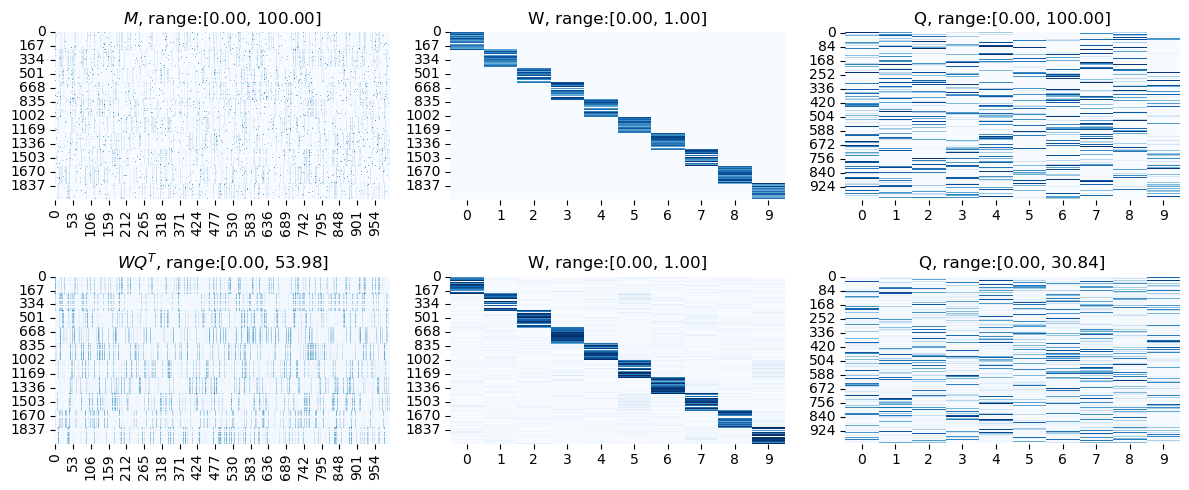

In [17]:
show_synthetic_result(MF_data.W, MF_data.Q, MF_data.M,
                      true_W, true_Q)

In [45]:
from matplotlib import pyplot
pyplot.plot(loss)

NameError: name 'loss' is not defined

In [24]:
clf = ICQF(n_components=10,
           W_upperbd=(True, 1.0),
           M_upperbd=(True, np.max(MF_data.M)),
           Q_upperbd=(False, 1.0),
           method='cd', max_iter=500, min_iter=10, tol=1e-4,
           W_beta=0.1, Q_beta=0.0)

In [25]:
tic = time.perf_counter()
MF_data, loss = clf.fit_transform(MF_data)
toc = time.perf_counter()
print(f"solving time : {toc-tic:0.4f}s")

Initialization time: 0.7940s
solving time : 21.0455s


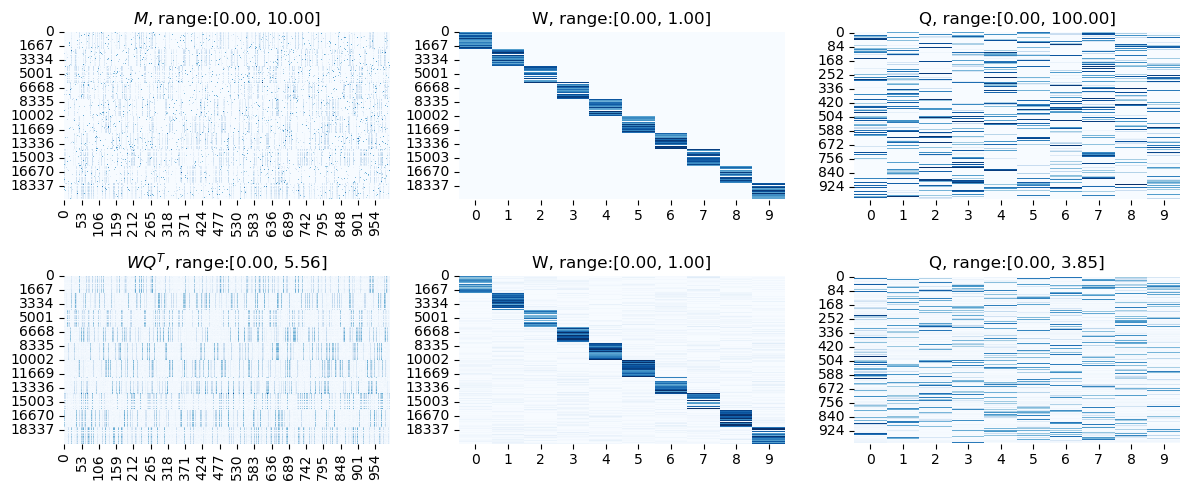

In [26]:
show_synthetic_result(MF_data.W, MF_data.Q, MF_data.M,
                      true_W, true_Q)

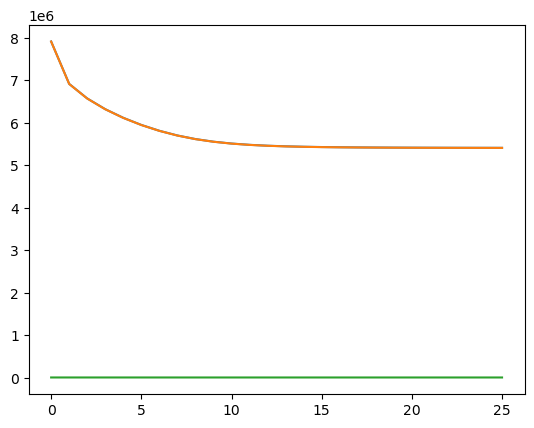

In [27]:
from matplotlib import pyplot
pyplot.plot(loss)

In [10]:
clf = ICQF(n_components=10,
           W_upperbd=(False, 1.0),
           M_upperbd=(False, np.max(MF_data.M)),
           Q_upperbd=(False, 1.0),
           method='cd', max_iter=4000, min_iter=10, tol=1e-7,
           W_beta=0.0, Q_beta=0.0)

In [11]:
tic = time.perf_counter()
MF_data, loss = clf.fit_transform(MF_data)
toc = time.perf_counter()
print(f"solving time : {toc-tic:0.4f}s")

Initialization time: 0.1201s
solving time : 2.9144s


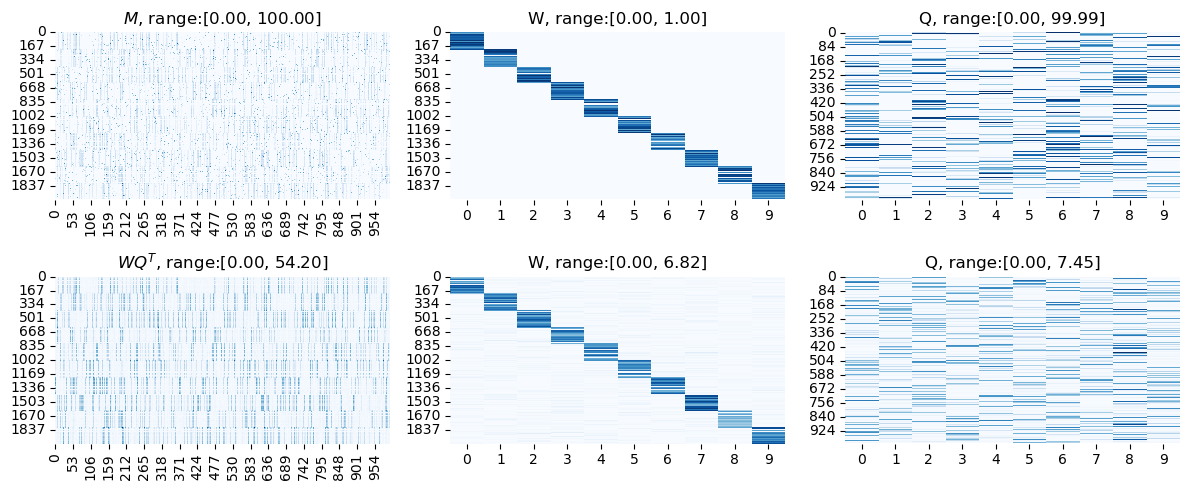

In [12]:
show_synthetic_result(MF_data.W, MF_data.Q, MF_data.M,
                      true_W, true_Q)

In [18]:
clf = ICQF(n_components=10,
           W_upperbd=(True, 1.0),
           M_upperbd=(True, np.max(MF_data.M)),
           Q_upperbd=(False, 1.0),
           method='admm', max_iter=500, min_iter=10, tol=1e-4,
           W_beta=0.1, Q_beta=0.0)

In [19]:
tic = time.perf_counter()
MF_data, loss = clf.fit_transform(MF_data)
toc = time.perf_counter()
print(f"solving time : {toc-tic:0.4f}s")

Initialization time: 0.0871s
solving time : 29.9448s


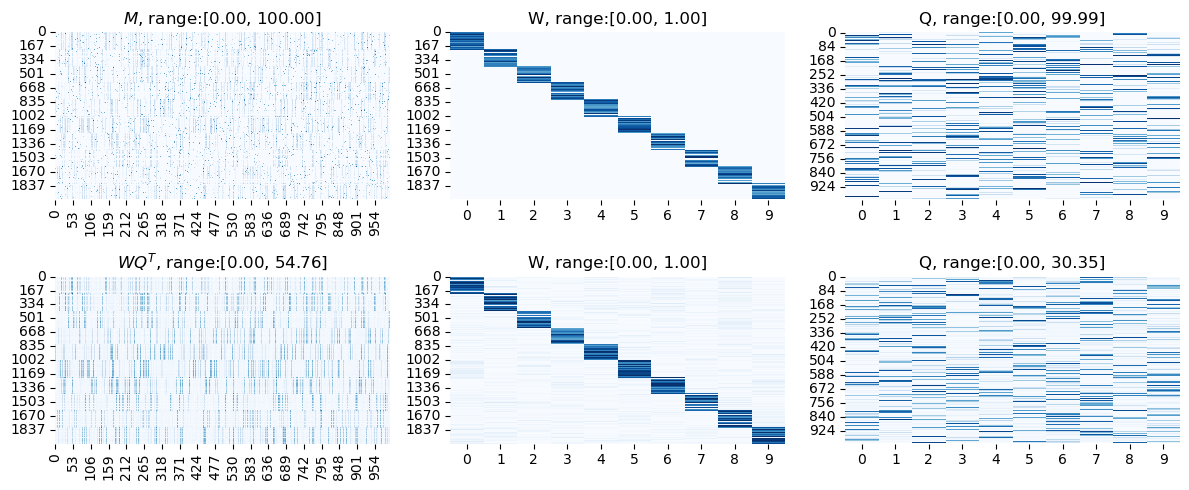

In [20]:
show_synthetic_result(MF_data.W, MF_data.Q, MF_data.M,
                      true_W, true_Q)

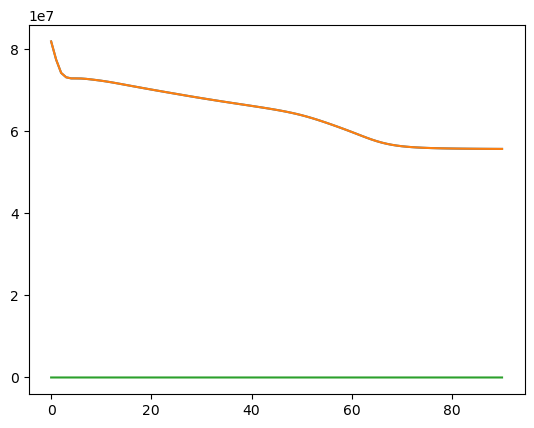

In [21]:
from matplotlib import pyplot
pyplot.plot(loss)

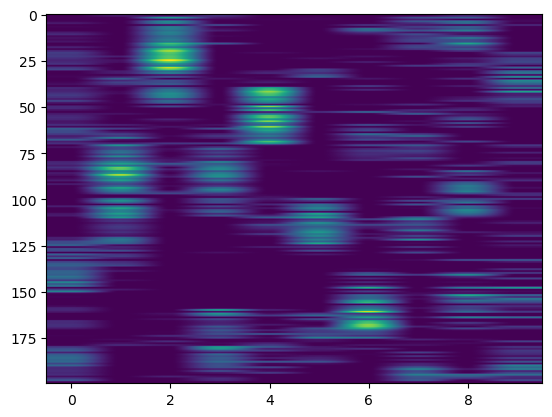

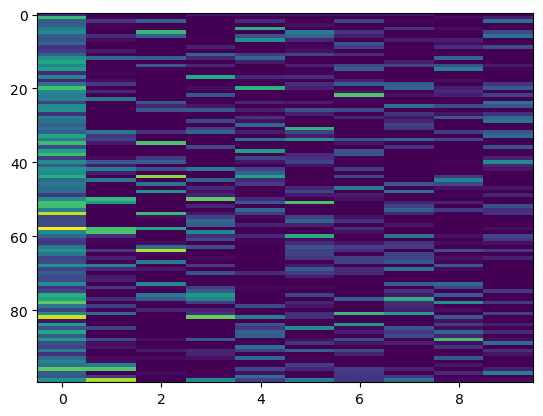

In [10]:
from matplotlib import pyplot
pyplot.imshow(MF_data.W, aspect='auto')
pyplot.show()
pyplot.imshow(MF_data.Q, aspect='auto')
pyplot.show()

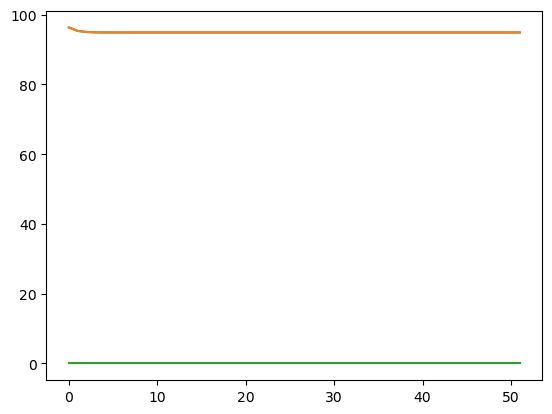

In [11]:
from matplotlib import pyplot
pyplot.plot(loss)

In [12]:
clf = ICQF(n_components=10,
           W_upperbd=(False, 1.0),
           M_upperbd=(True, np.max(MF_data.M)),
           Q_upperbd=(False, 1.0),
           method='admm', tau=np.sqrt(2), rho=np.sqrt(2),
           W_beta=0.1, Q_beta=0.1)

In [13]:
MF_data, loss = clf.fit_transform(MF_data)

Initialization time: -0.0335s


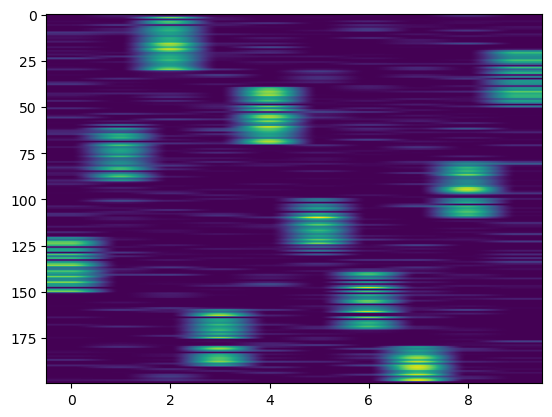

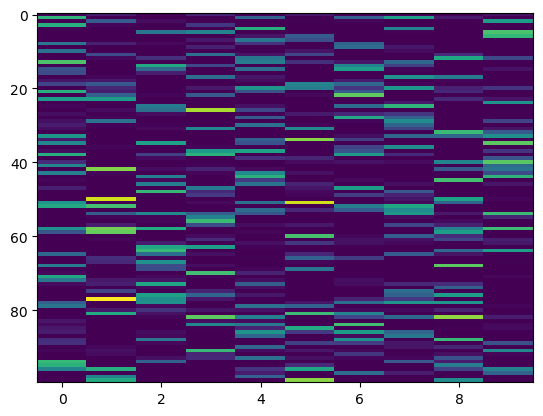

In [14]:
pyplot.imshow(MF_data.W, aspect='auto')
pyplot.show()
pyplot.imshow(MF_data.Q, aspect='auto')
pyplot.show()

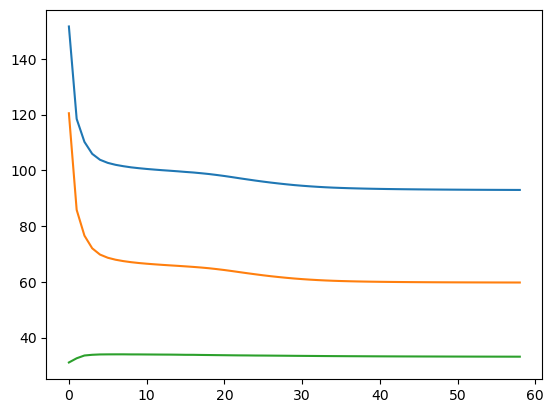

In [15]:
from matplotlib import pyplot
pyplot.plot(loss)

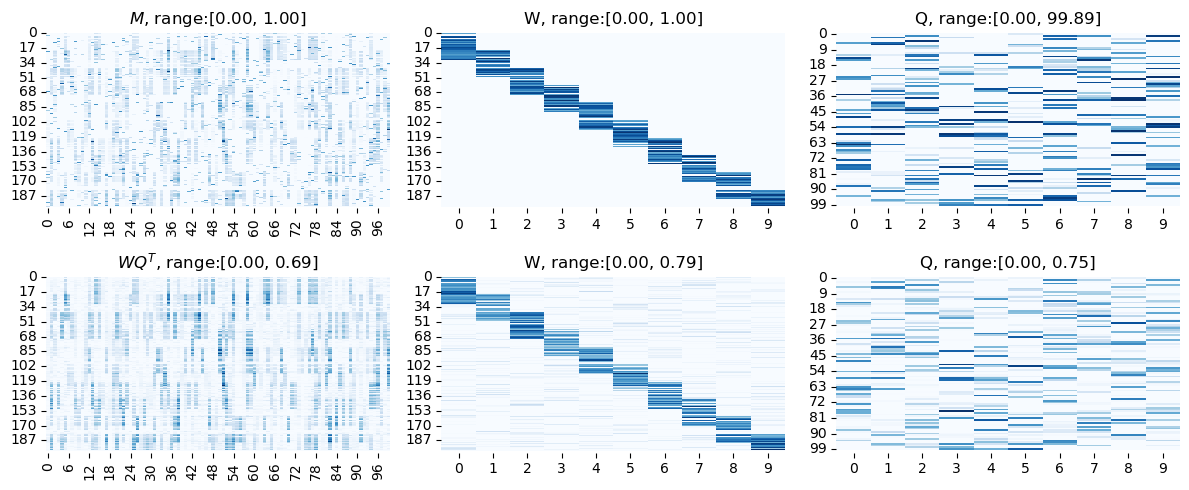

In [16]:
show_synthetic_result(MF_data.W, MF_data.Q, MF_data.M,
                      true_W, true_Q)

In [23]:
from sklearn.decomposition import NMF
import time
model = NMF(n_components=10, init='random', random_state=0)

tic = time.perf_counter()
W = model.fit_transform(MF_data.M)
H = model.components_

toc = time.perf_counter()

print(f"sklearn NMF solving time : {tic-toc:0.4f}s")

sklearn NMF solving time : -0.0343s


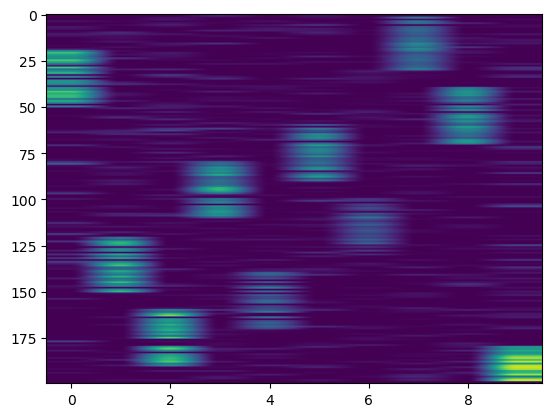

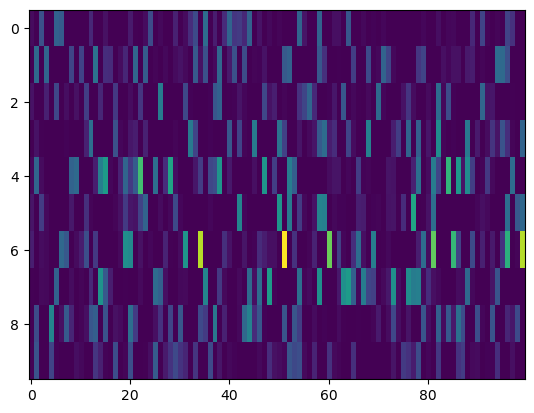

In [24]:
from matplotlib import pyplot
pyplot.imshow(W, aspect='auto')
pyplot.show()
pyplot.imshow(H, aspect='auto')
pyplot.show()

In [25]:
model.n_iter_

36

In [26]:
model.reconstruction_err_

10.903355760840189

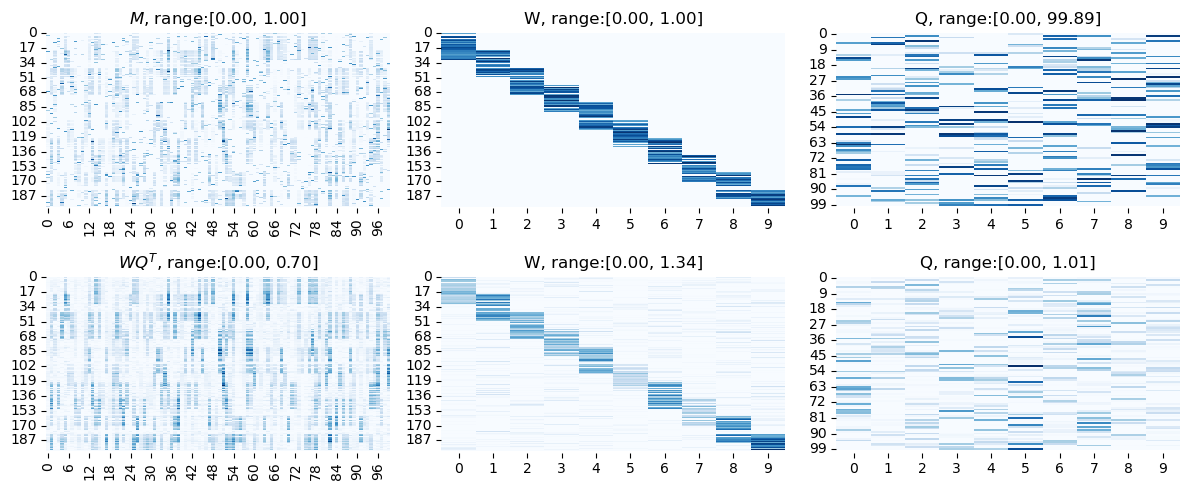

In [27]:
show_synthetic_result(W, H.T, MF_data.M,
                      true_W, true_Q)

In [32]:
np.arange(5,7)

array([5, 6])